In [607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,classification_report,roc_curve,auc

sns.set_style('whitegrid')

In [608]:
heart_data = pd.read_csv("archive/heart.csv")

In [ ]:
heart_data['ca']

In [553]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [554]:
heart_data.rename(columns={'thalach':'heart_rate',},inplace=True)

In [555]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,heart_rate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [556]:
heart_data.shape

(303, 14)

In [557]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   sex         303 non-null    int64  
 2   cp          303 non-null    int64  
 3   trestbps    303 non-null    int64  
 4   chol        303 non-null    int64  
 5   fbs         303 non-null    int64  
 6   restecg     303 non-null    int64  
 7   heart_rate  303 non-null    int64  
 8   exang       303 non-null    int64  
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    int64  
 11  ca          303 non-null    int64  
 12  thal        303 non-null    int64  
 13  target      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [558]:
heart_data.nunique()

age            41
sex             2
cp              4
trestbps       49
chol          152
fbs             2
restecg         3
heart_rate     91
exang           2
oldpeak        40
slope           3
ca              5
thal            4
target          2
dtype: int64

In [559]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,heart_rate,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Univariate Analysis

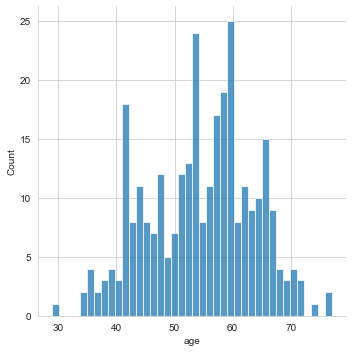

In [560]:
sns.displot(heart_data['age'],bins=40)

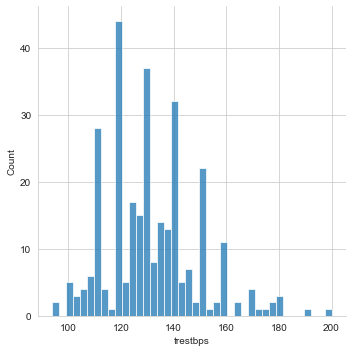

In [561]:
sns.displot(heart_data['trestbps'],bins=40)

obs:Trestbps also has outliers

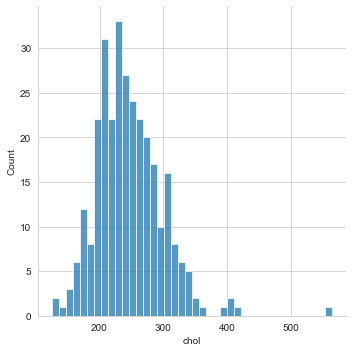

In [562]:
sns.displot(heart_data['chol'],bins=40)

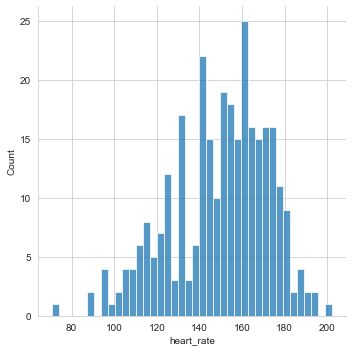

In [563]:
sns.displot(heart_data['heart_rate'],bins=40)

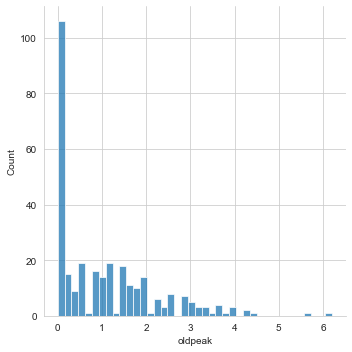

In [564]:
sns.displot(heart_data['oldpeak'],bins=40)

In [565]:
#outlier Treatment

outlier_columns = ['age','trestbps','chol','heart_rate','oldpeak']

for column in outlier_columns:
    iqr = np.percentile(heart_data[column],75) - np.percentile(heart_data[column],25)
    ll = np.percentile(heart_data[column],25) - (1.5 * iqr)
    ul = np.percentile(heart_data[column],75) + (1.5 * iqr)
    
    heart_data.loc[heart_data[column]>ul,column] = np.nan
    heart_data.loc[heart_data[column]<ll,column] = np.nan
    
    #heart_data[column] = heart_data[column].fillna(heart_data[column].mean())
    heart_data.dropna(inplace=True)

In [566]:
#Converting the datatypes
heart_data['sex'] = heart_data['sex'].astype('category')
heart_data['cp'] = heart_data['cp'].astype('category')
heart_data['fbs'] = heart_data['fbs'].astype('category')
heart_data['restecg'] = heart_data['restecg'].astype('category')
heart_data['exang'] = heart_data['exang'].astype('category')
heart_data['slope'] = heart_data['slope'].astype('category')
heart_data['ca'] = heart_data['ca'].astype('category')
heart_data['thal'] = heart_data['thal'].astype('category')
heart_data['target'] = heart_data['target'].astype('category')


In [567]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         284 non-null    float64 
 1   sex         284 non-null    category
 2   cp          284 non-null    category
 3   trestbps    284 non-null    float64 
 4   chol        284 non-null    float64 
 5   fbs         284 non-null    category
 6   restecg     284 non-null    category
 7   heart_rate  284 non-null    float64 
 8   exang       284 non-null    category
 9   oldpeak     284 non-null    float64 
 10  slope       284 non-null    category
 11  ca          284 non-null    category
 12  thal        284 non-null    category
 13  target      284 non-null    category
dtypes: category(9), float64(5)
memory usage: 17.2 KB


### Bivariate Analysis

<AxesSubplot:xlabel='sex', ylabel='age'>

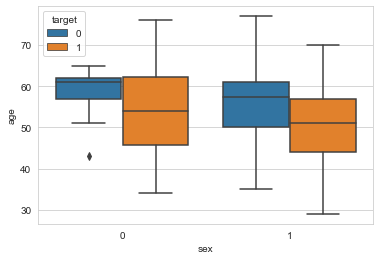

In [568]:
sns.boxplot(x='sex',y='age',hue='target',data=heart_data)

<AxesSubplot:xlabel='cp', ylabel='count'>

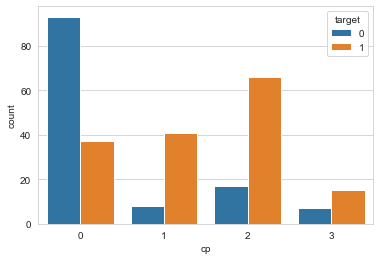

In [569]:
sns.countplot(x='cp',hue='target',data=heart_data)

<AxesSubplot:xlabel='fbs', ylabel='count'>

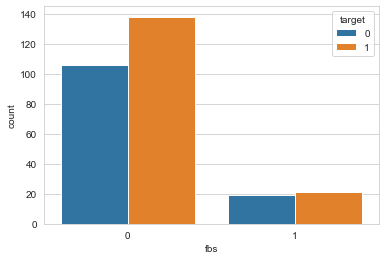

In [570]:
sns.countplot(x='fbs',hue='target',data=heart_data)

<AxesSubplot:xlabel='restecg', ylabel='count'>

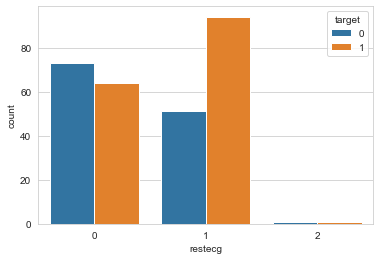

In [571]:
sns.countplot(x='restecg',hue='target',data=heart_data)

<AxesSubplot:xlabel='thal', ylabel='heart_rate'>

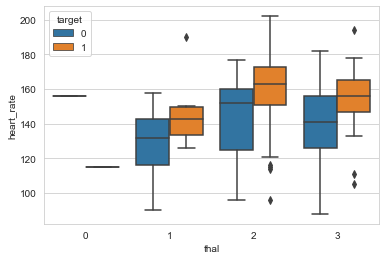

In [572]:
sns.boxplot(x='thal',y='heart_rate',hue='target',data=heart_data)

<AxesSubplot:xlabel='exang', ylabel='heart_rate'>

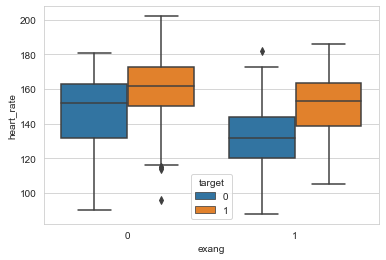

In [573]:
sns.boxplot(x='exang',y='heart_rate',hue='target',data=heart_data)

<AxesSubplot:xlabel='ca', ylabel='chol'>

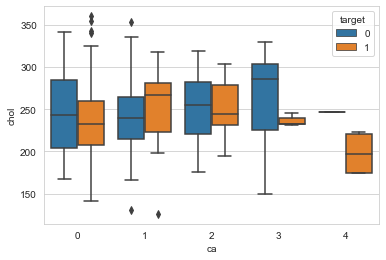

In [606]:
sns.boxplot(x='ca',y='chol',hue='target',data=heart_data)

In [ ]:
obs: CA 

In [574]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         284 non-null    float64 
 1   sex         284 non-null    category
 2   cp          284 non-null    category
 3   trestbps    284 non-null    float64 
 4   chol        284 non-null    float64 
 5   fbs         284 non-null    category
 6   restecg     284 non-null    category
 7   heart_rate  284 non-null    float64 
 8   exang       284 non-null    category
 9   oldpeak     284 non-null    float64 
 10  slope       284 non-null    category
 11  ca          284 non-null    category
 12  thal        284 non-null    category
 13  target      284 non-null    category
dtypes: category(9), float64(5)
memory usage: 25.3 KB


In [575]:
heart_data['target'] = heart_data['target'].astype('int')

In [576]:
heart_data_final = pd.get_dummies(heart_data)

### Classification

In [577]:
features = [col for col in heart_data_final.columns if col != 'target']

X_train, X_test, y_train, y_test = train_test_split(heart_data_final[features], heart_data_final['target'], test_size=.1, random_state=22,)
X_train.shape, X_test.shape

((255, 30), (29, 30))

In [578]:
logisticRegr = LogisticRegression(solver='liblinear')

In [579]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [580]:
predictions = logisticRegr.predict(X_test)

In [581]:
print("Train:",logisticRegr.score(X_train, y_train))
print("Test:",logisticRegr.score(X_test, y_test))
print("Precision Score:",precision_score(y_test, predictions, average='macro'))
print("Recall Score:",recall_score(y_test,predictions,average='macro'))


Train: 0.8627450980392157
Test: 0.9655172413793104
Precision Score: 0.9615384615384616
Recall Score: 0.9705882352941176


In [582]:
print("Confusion Matrix:/n",confusion_matrix(y_test,predictions))

Confusion Matrix:/n [[16  1]
 [ 0 12]]


In [583]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      1.00      0.96        12

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.96        29
weighted avg       0.97      0.97      0.97        29



In [584]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

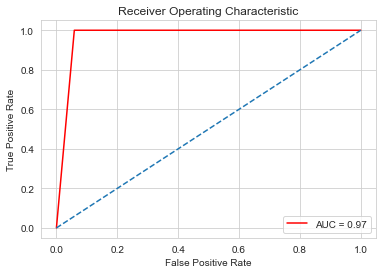

In [586]:

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [591]:
print(list(zip(logisticRegr.coef_)))

[(array([ 0.00793105, -0.01134981, -0.00670513,  0.01872024, -0.47829548,
        0.64327619, -0.53908235, -0.9146279 , -0.07291129,  0.63012523,
        0.4616078 , -0.12976144,  0.23395529, -0.23730941,  0.32404799,
        0.01745526,  0.33004648, -0.22585264, -0.0965408 , -0.32706389,
        0.52779853,  1.30760681, -0.56729138, -0.90075704, -0.36303632,
        0.62767177, -0.33712332,  0.37119766,  0.69457062, -0.62445112]),)]


In [594]:
print(dict(zip(features,logisticRegr.coef_)))

{'age': array([ 0.00793105, -0.01134981, -0.00670513,  0.01872024, -0.47829548,
        0.64327619, -0.53908235, -0.9146279 , -0.07291129,  0.63012523,
        0.4616078 , -0.12976144,  0.23395529, -0.23730941,  0.32404799,
        0.01745526,  0.33004648, -0.22585264, -0.0965408 , -0.32706389,
        0.52779853,  1.30760681, -0.56729138, -0.90075704, -0.36303632,
        0.62767177, -0.33712332,  0.37119766,  0.69457062, -0.62445112])}


In [595]:
logReg_coeff = pd.DataFrame({'feature_name': features, 'model_coefficient': logisticRegr.coef_.transpose().flatten()})

In [602]:
logReg_coeff.sort_values(by='model_coefficient',ascending=False).head(4)

,feature_name,model_coefficient
21,ca_0,1.307607
28,thal_2,0.694571
5,sex_0,0.643276
9,cp_2,0.630125
25,ca_4,0.627672
